![](https://www.extensiv.com/hubfs/Skubana/Blog%20Pages/Imported_Blog_Media/big%20data%20analytics%2C%20business%20team%20working%20on%20computer-Oct-12-2022-05-51-21-63-PM.jpg)

<div style="border: 10px solid #3498db; border-radius: 30px; padding: 40px; box-shadow: 10px 10px 25px #05DDB0; background: linear-gradient(to bottom right, #D6EAF8, #EBF5FB);">
    <h2 style="font-size: 34px; font-weight: bold; color: #FDFDFD; text-align: center; border-bottom: 5px solid #F1C40F; font-family: 'Arial'; padding: 20px; margin-top: 0; box-shadow: 5px 5px 15px #7D8A99; background-color: #0C2745; border-radius: 20px;">About Dataset </h2>
    <ul style="font-size: 18px; font-family: 'Calibri'; padding: 30px; line-height: 1.7; list-style-type: none;">
        <li>📌 <strong style="color: #0E6655;">Dataset Origin:</strong> This dataset contains the records of 12 Compte of client accounts in 2022.</li>
        <li>📄 <strong style="color: #0E6655;">Attributes:</strong>
            <ul>
                <li> Date:The date and time of each transaction. </li>
                <li>Id Compte: Unique identifier for client accounts.</li>
                <li>Amount Transaction: The amount involved in each transaction</li>
                <li>Category Transaction: Categorization of each transaction (e.g., Food & Drink, Bank Transfers).</li>
            </ul>
        </li>
    </ul>
</div>

<a id='1'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#0C2745"><b><span style='color:#FDFDFD'>1 |</span></b> <b>Importing Libraries</b></div>

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import HTML as html_print
import warnings

from termcolor import colored
from IPython.display import display
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='2'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#0C2745"><b><span style='color:#FDFDFD'>2 |</span></b> <b>Adjusting Row & Column Settings</b></div>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

<a id='3'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#0C2745"><b><span style='color:#FDFDFD'>3 |</span></b> <b>Loading The Data Set</b></div>

In [5]:
df = pd.read_csv('/kaggle/input/effyis-datalab-challenge/train_test_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01 00:23:00,SEWC_CL.1,462.960,Food & Drink - Groceries
1,2022-01-01 00:26:00,SEW0C_LI.1,15.510,General Services - Home Repair + Maintenance
2,2022-01-01 01:01:00,US.1,2.240,Bank Transfers - ATM withdrawals
3,2022-01-01 01:21:00,TA.1,2.860,Transportation - Public Transport
4,2022-01-01 01:54:00,US.1,1.680,Bank Transfers - ATM withdrawals


<a id='4'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#0C2745"><b><span style='color:#FDFDFD'>4 |</span></b> <b>Data Preprocessing</b></div>

We can see that the dataset doesn't have any missing values.

In [7]:
df.isna().sum()

Date                    0
Id_compte               0
amount_transaction      0
category_transaction    0
dtype: int64

In [8]:
le = LabelEncoder()
df['Id_compte_encoded'] = le.fit_transform(df['Id_compte'])

In [9]:
df['category_transaction'] = df['category_transaction'].apply(lambda x: x.split('-')[0])

In [ ]:
df.head()

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
# Initialize a new DataFrame to store the processed data
df_new = pd.DataFrame()

# Iterate over unique account IDs to process each separately
for i in range(12):
    # Resample the dataset to daily frequency, aggregating data for each day
    daily_aggregated_data = df[df['Id_compte_encoded'] == i].drop('Id_compte_encoded', axis=1).resample('D').sum()
    
    # Re-attach the account ID to the resampled data
    daily_aggregated_data['Id_compte_encoded'] = np.array([i for _ in range(daily_aggregated_data.shape[0])])
    
    # Append the processed data for this account to the main DataFrame
    df_new = pd.concat([df_new, daily_aggregated_data])


In [ ]:
df_new.head()

<a id='5'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#0C2745"><b><span style='color:#FDFDFD'>5 |</span></b> <b>Exploratory Data Analysis</b></div>

In [11]:
import plotly.express as px
import pandas as pd
fig = px.bar(df, x='category_transaction', y='amount_transaction', title='Total Amount by Transaction Category',
             labels={'category_transaction': 'Transaction Category', 'amount_transaction': 'Amount Spent'},
             color='category_transaction')

fig.show()

In [13]:
# Pie chart showing percentage distribution by transaction category
fig = px.pie(df, values='amount_transaction', names='category_transaction', title='Spending Distribution by Category')

fig.show()

In [28]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))
    
def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Info')
    print(dataframe.info())
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)

In [29]:
check_df(df_new)

Shape
(3727, 4)
Types
Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3727 entries, 2022-01-01 to 2022-11-06
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id_compte             3727 non-null   object 
 1   amount_transaction    3727 non-null   float64
 2   category_transaction  3727 non-null   object 
 3   Id_compte_encoded     3727 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 145.6+ KB
None
Head & Tail


,Id_compte,amount_transaction,category_transaction,Id_compte_encoded
Date,,,,
2022-01-01 00:00:00,CPA.1CPA.1,10.340000,Bank TransfersBank Transfers,0
2022-01-02 00:00:00,CPA.1CPA.1CPA.1CPA.1CPA.1,31.490000,Bank TransfersBank TransfersBank TransfersBank TransfersBank Transfers,0
2022-01-03 00:00:00,CPA.1CPA.1CPA.1CPA.1CPA.1CPA.1,1430.340000,Bank TransfersBank TransfersBank TransfersBank TransfersBank TransfersGeneral Merchandise,0
2022-01-04 00:00:00,CPA.1CPA.1CPA.1CPA.1CPA.1CPA.1,32.900000,Bank TransfersBank TransfersBank TransfersBank TransfersBank TransfersBank Transfers,0
2022-01-05 00:00:00,0,0.000000,0,0


,Id_compte,amount_transaction,category_transaction,Id_compte_encoded
Date,,,,
2022-11-02 00:00:00,US.1US.1US.1US.1US.1US.1US.1US.1US.1US.1,301.880000,Food & DrinkFood & DrinkBank TransfersTransportationBank TransfersFood & DrinkRent & UtilitiesTransportationBank TransfersTransportation,11
2022-11-03 00:00:00,US.1US.1US.1US.1US.1US.1US.1,431.920000,Bank TransfersBank TransfersFood & DrinkRent & UtilitiesBank TransfersFood & DrinkBank Transfers,11
2022-11-04 00:00:00,US.1US.1US.1US.1US.1US.1US.1US.1US.1,368.580000,Bank TransfersTransportationFood & DrinkBank TransfersBank TransfersTransportationFood & DrinkFood & DrinkGeneral Services,11
2022-11-05 00:00:00,US.1US.1,3.920000,Bank TransfersBank Transfers,11
2022-11-06 00:00:00,US.1US.1US.1US.1,5.380000,TransportationBank TransfersTransportationBank Transfers,11


NA Values


,Column,Number of NA
0,Id_compte,0
1,amount_transaction,0
2,category_transaction,0
3,Id_compte_encoded,0


<Figure size 1200x600 with 0 Axes>

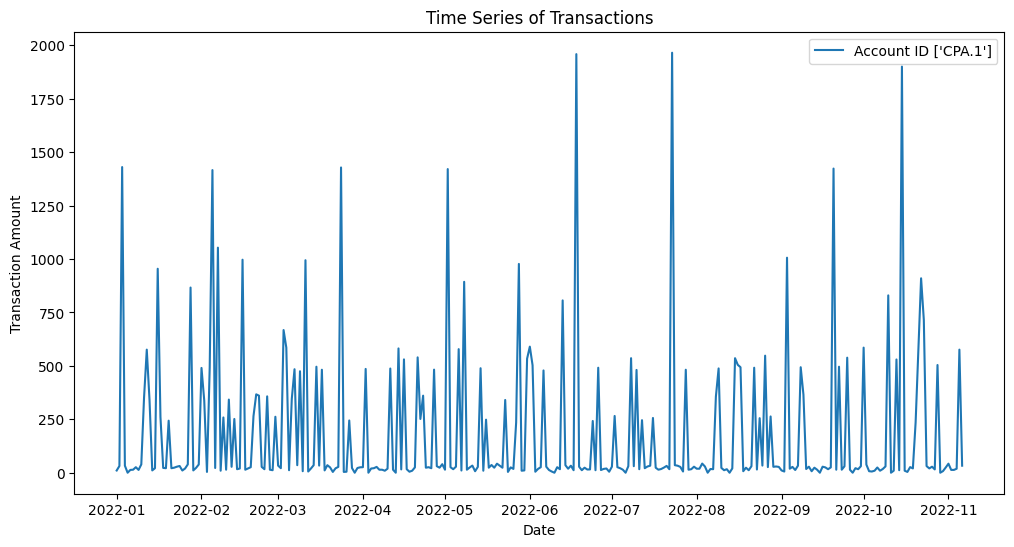

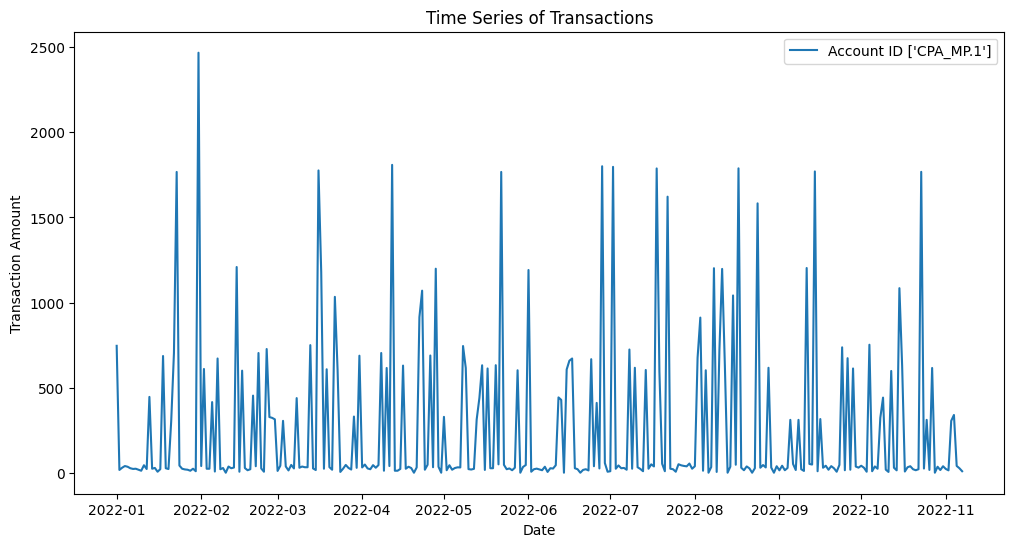

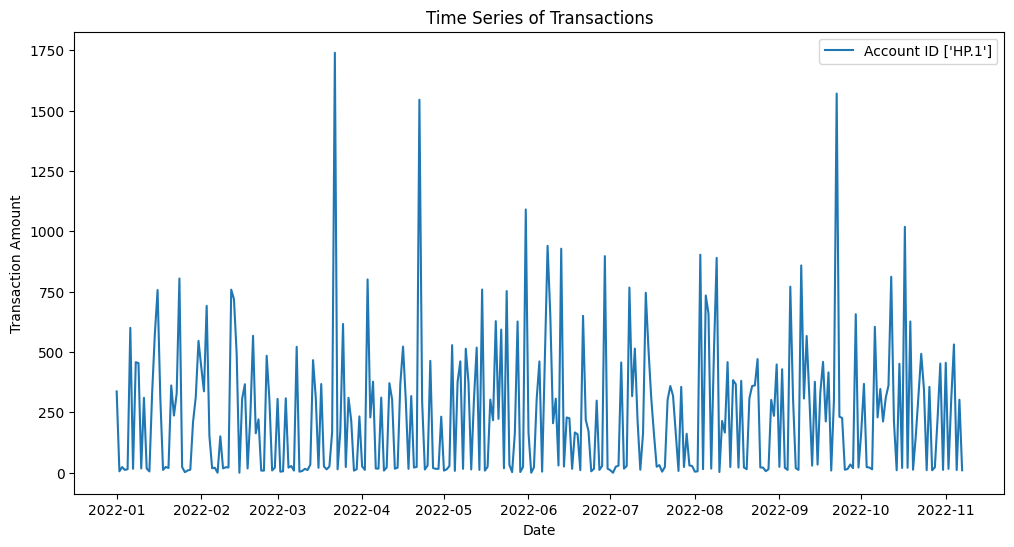

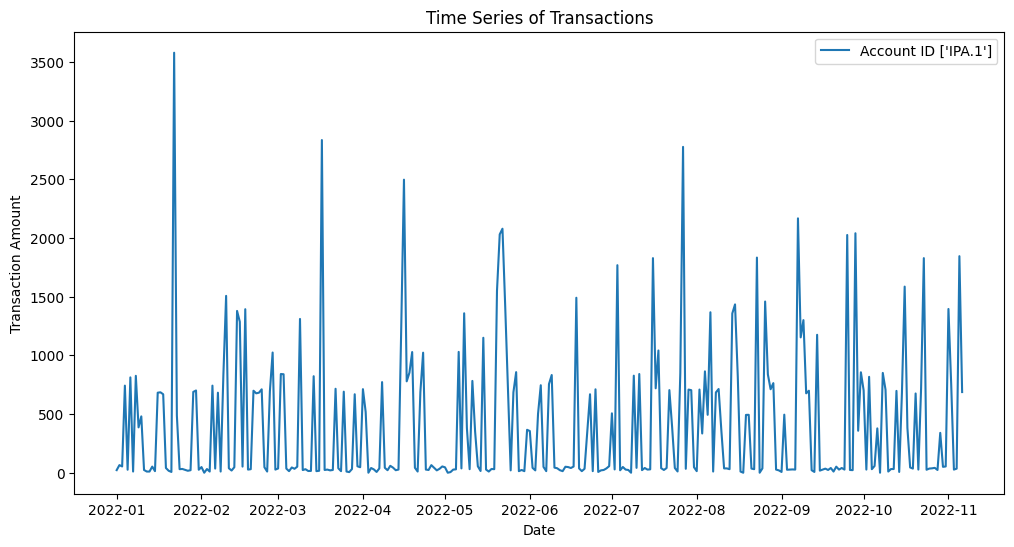

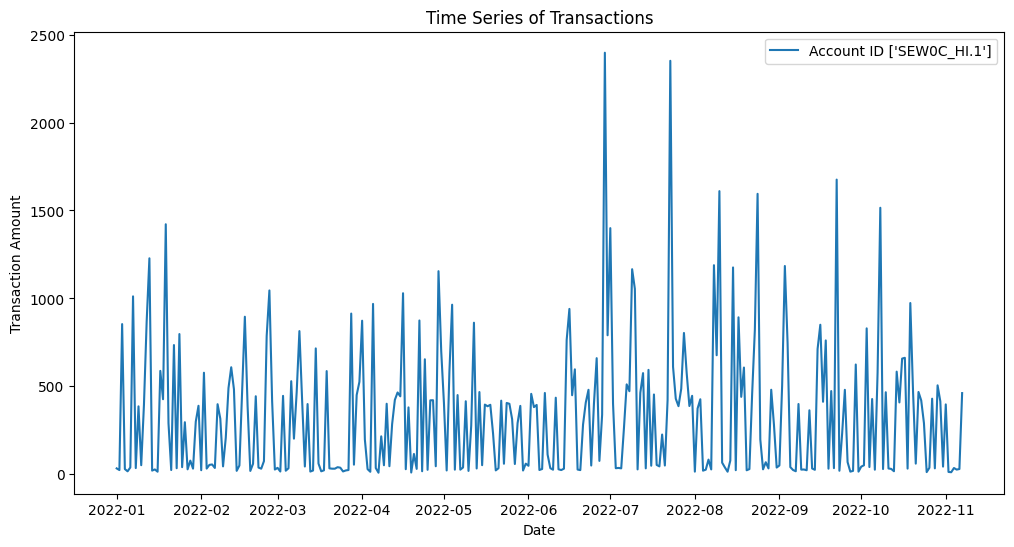

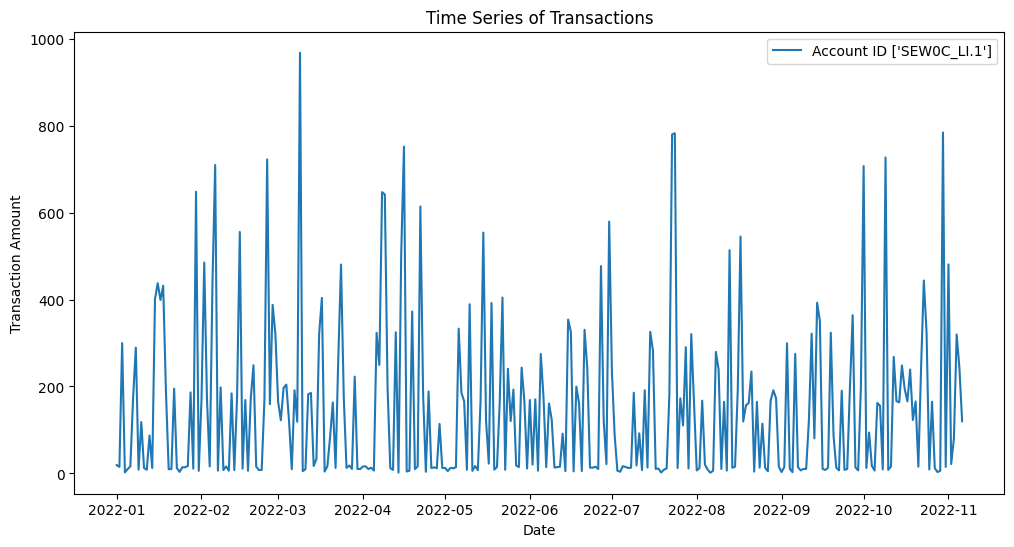

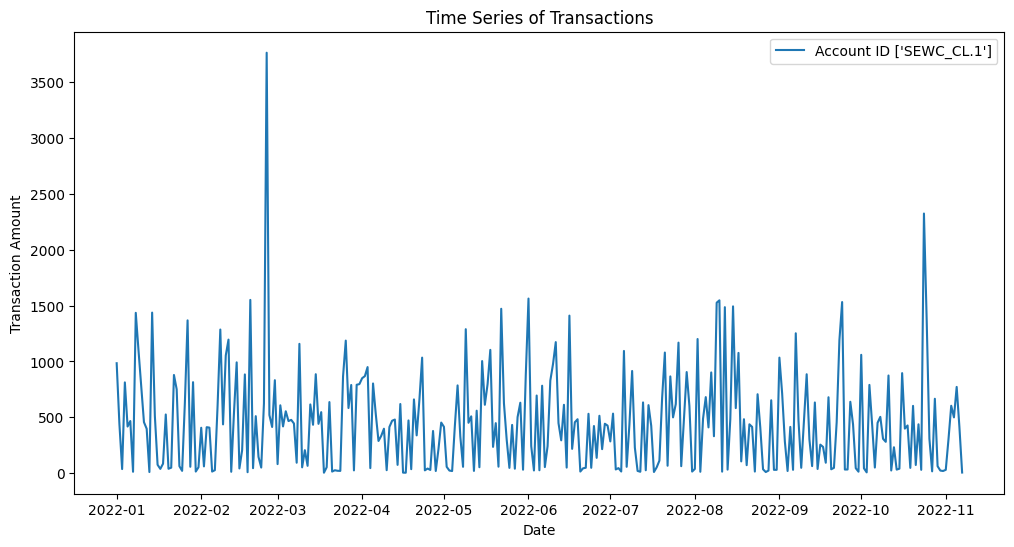

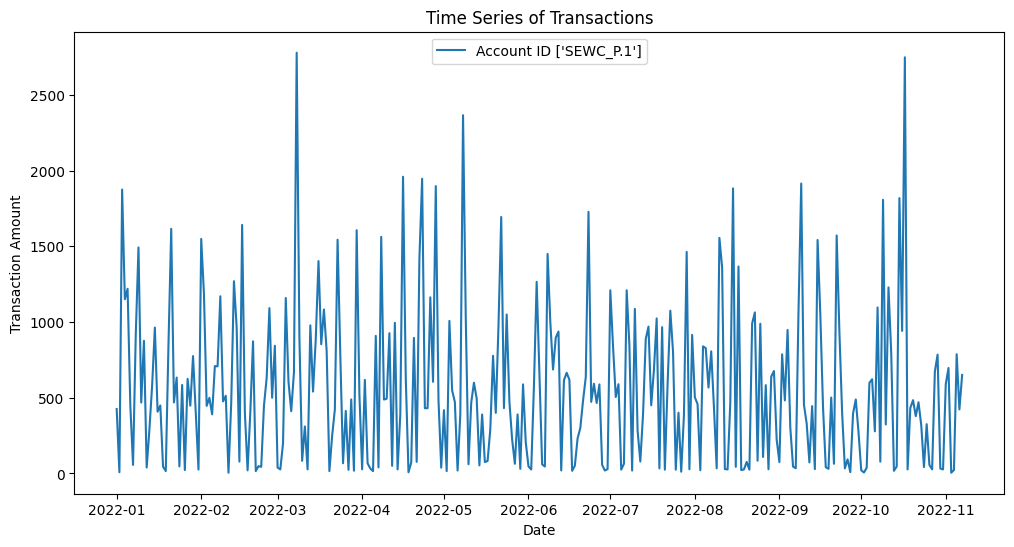

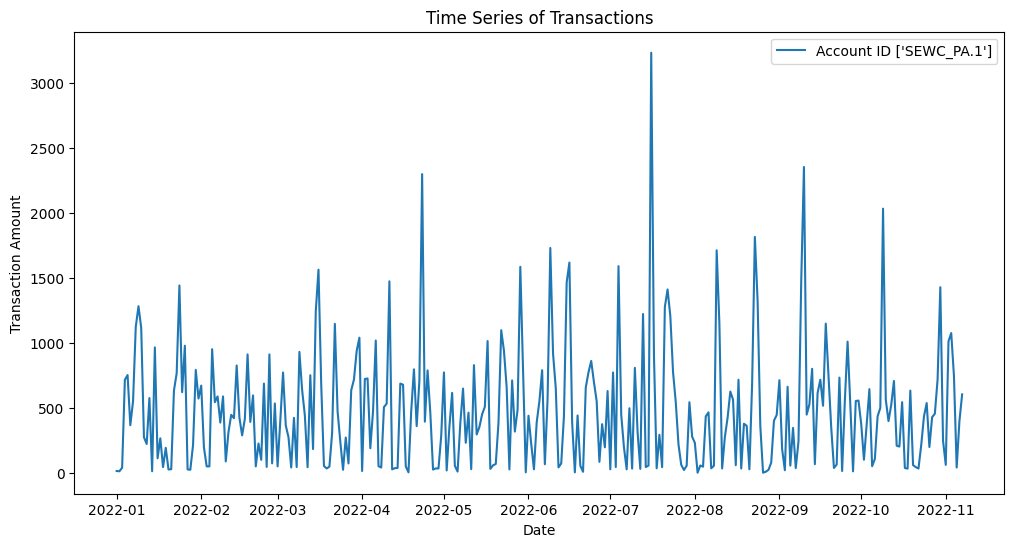

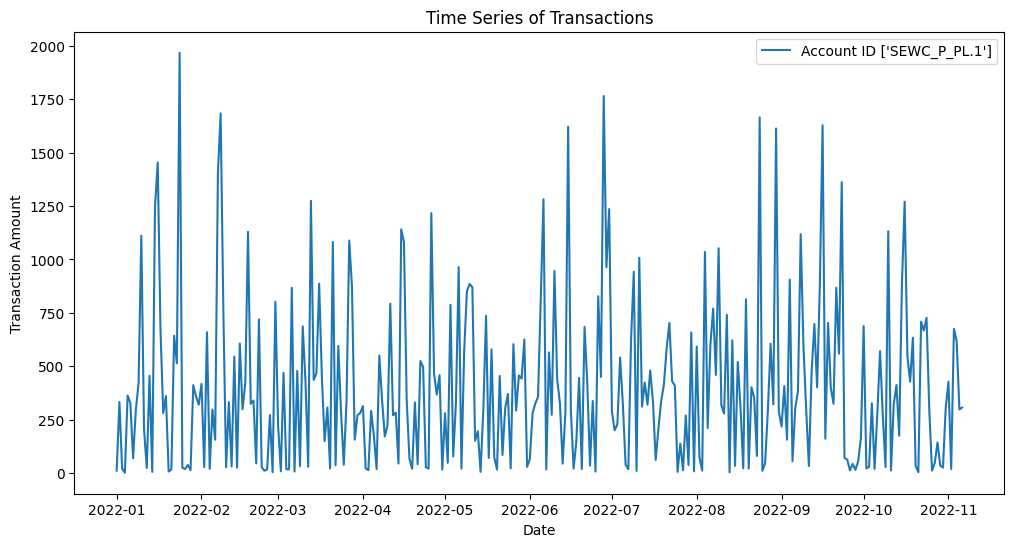

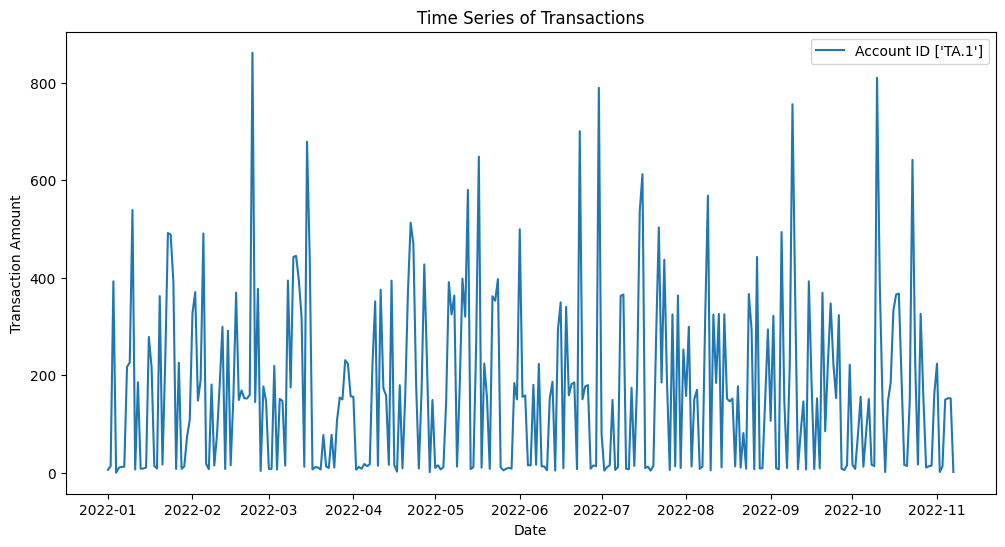

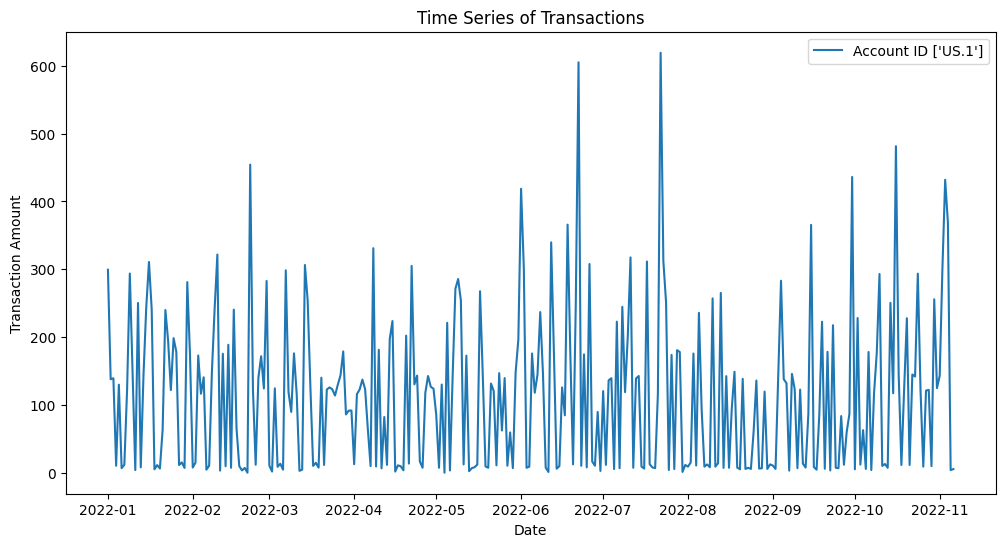

In [30]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(12, 6))

# Loop through each unique account ID (Id_compte_encoded) from 0 to 11
for i in range(12):
    # Create a new figure for each account with a specific size
    plt.figure(figsize=(12, 6))

    # Filter the data for the current account ID (Id_compte_encoded)
    subset_data = df_new[df_new['Id_compte_encoded'] == i]
    
    # Create a plot for the filtered data, showing transactions for the current account ID
    plt.plot(subset_data['amount_transaction'], label=f'Account ID {le.inverse_transform(np.array([i]))}')

    # Set the title of the plot to indicate it's a time series of transactions
    plt.title('Time Series of Transactions')

    # Label the x-axis as 'Date'
    plt.xlabel('Date')

    # Label the y-axis as 'Transaction Amount'
    plt.ylabel('Transaction Amount')

    # Display a legend to distinguish between different account IDs
    plt.legend()

    # Show the plot
    plt.show()
